In [1]:
# Packages
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import random

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.test_loss = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.test_loss.append(logs.get('test_loss'))

look_back = 10

Using TensorFlow backend.


In [2]:
# Making Dataset
signal_data = []
for i in range(365):
    random_5 = random.randint(1,5)
    signal_data.append(random_5)
signal_data=np.array(signal_data)
signal_data=signal_data[:,None]

In [3]:
# Preprocessing
scaler = MinMaxScaler(feature_range=(1, 5))
signal_data = scaler.fit_transform(signal_data)

In [4]:
# Train & Test
train = signal_data[0:290]
test = signal_data[290:]

In [5]:
# Dataset
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

In [6]:
# Preprocessing
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [7]:
# LSTM Model
model = Sequential()
for i in range(2):
    model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True, return_sequences=True))
    model.add(Dropout(0.5))
model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dropout(0.5))
model.add(Dense(1))

In [8]:
# model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [9]:
# learning
custom_hist = CustomHistory()
custom_hist.init()

for i in range(30):
    model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, callbacks=[custom_hist])
    model.reset_states()

Epoch 1/1
280/280 [==============================] - 5s 17ms/step - loss: 3.5341 - acc: 0.1786
Epoch 1/1
280/280 [==============================] - 4s 13ms/step - loss: 2.5313 - acc: 0.1786: 0s - loss: 2
Epoch 1/1
280/280 [==============================] - 4s 13ms/step - loss: 2.5416 - acc: 0.1857
Epoch 1/1
280/280 [==============================] - 4s 13ms/step - loss: 2.4277 - acc: 0.2071
Epoch 1/1
280/280 [==============================] - 4s 13ms/step - loss: 2.3464 - acc: 0.2000
Epoch 1/1
280/280 [==============================] - 4s 13ms/step - loss: 2.4930 - acc: 0.2000
Epoch 1/1
280/280 [==============================] - 4s 13ms/step - loss: 2.3111 - acc: 0.2429
Epoch 1/1
280/280 [==============================] - 4s 13ms/step - loss: 2.5662 - acc: 0.1607
Epoch 1/1
280/280 [==============================] - 4s 13ms/step - loss: 2.4426 - acc: 0.1857
Epoch 1/1
280/280 [==============================] - 4s 13ms/step - loss: 2.1795 - acc: 0.2214
Epoch 1/1
280/280 [=================

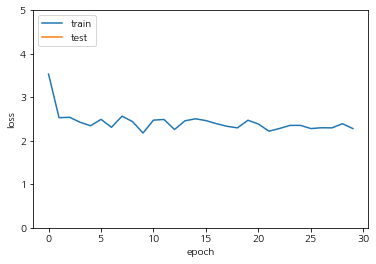

In [10]:
plt.plot(custom_hist.train_loss)
plt.plot(custom_hist.test_loss)
plt.ylim(0.0, 5.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
trainScore = model.evaluate(x_train, y_train)
model.reset_states()
print('Train Score: ', trainScore)
testScore = model.evaluate(x_test, y_test)
model.reset_states()
print('Test Score: ', testScore)

ValueError: In a stateful network, you should only pass inputs with a number of samples that can be divided by the batch size. Found: 280 samples

In [ ]:
look_ahead = 10
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()